# How environmental conditions influence shark presence and shark absence

In [1]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy
import statsmodels.formula.api as smf 

In [2]:
# Read in the dataset and do some quick data cleanup.
dat = pd.read_csv('D:/Documents/SpringBoard/capstone-1/datasets/final_files/combined/'
                  'filled/jackknifed_counts.csv', 
                 parse_dates=['Date']) 

dat['Receiver_D'] = dat['Receiver_D'].astype('category') # turn receiver D into a category
    # for analyses and plotting
dat['Year'] = dat['Year'].astype('category') # turn into a category
dat['Transmitter'] = pd.to_numeric(dat['Transmitter'], errors='coerce') # and make
    # sure that the 'Transmitter' (shark density) is numeric
    
dat['Receiver_D'] = dat['Receiver_D'].cat.remove_unused_categories()

In [3]:
dat['presence'] = dat['Transmitter'].copy() # make a copy of the transmitter data
dat['presence'].values[dat['presence'].values > 1] = 1 # and convert transmitter vals > 1
    # to 1
dat['presence'] = dat['presence'].astype('category') # convert to category so
    # that we can run some t-tests

In [4]:
# Split into two datasets so that we can easily run some t-tests
sharks = dat[dat['presence'] == 1] # sharks are there if the presence is 1
nosharks = dat[dat['presence'] == 0] # no sharks if presence is 0

              Zone
count  1302.000000
mean      3.104455
std       1.831443
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      12.000000


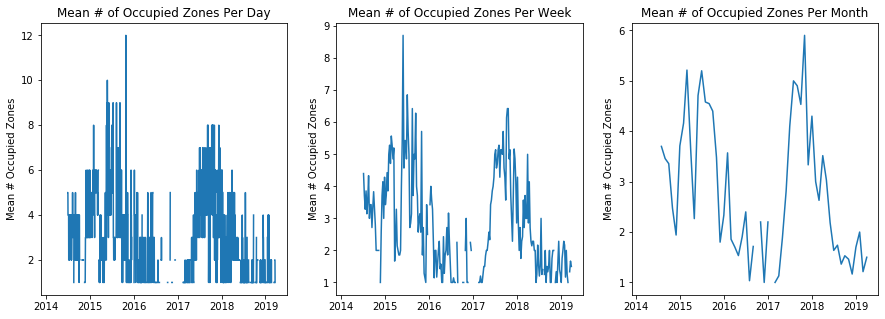

In [27]:
# How many regions are occupied each day? 
occupied = sharks.copy() # copy dataset with sharks
occupied = occupied[['Date', 'Zone']].groupby('Date').count()
    # count zones per day
print(occupied.describe()) # describe results 

# Plot mean # of occupied zones across days, weeks, months
days = occupied.resample('D').mean()
weeks = occupied.resample('W').mean()
months = occupied.resample('M').mean()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5)) # initialize plot
ax1.plot(days) # days
ax1.set_title('Mean # of Occupied Zones Per Day')
ax1.set_ylabel('Mean # Occupied Zones')
ax2.plot(weeks) # weeks
ax2.set_title('Mean # of Occupied Zones Per Week')
ax2.set_ylabel('Mean # Occupied Zones')
ax3.plot(months) # months
ax3.set_title('Mean # of Occupied Zones Per Month')
ax3.set_ylabel('Mean # Occupied Zones')
plt.show() # show plot

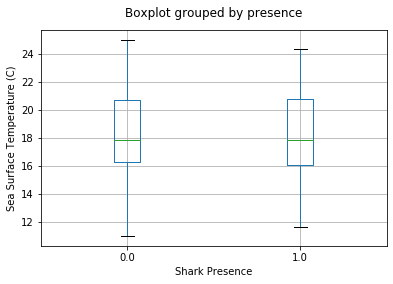

               mean       std
presence                     
0.0       18.391508  2.649823
1.0       18.312694  2.812262
Ttest_indResult(statistic=-1.8238732101088118, pvalue=0.06817584650347171)


In [5]:
# Plot the temperature ranges for shark presence vs absence
dat.boxplot('TempC', 'presence') #
plt.xlabel('Shark Presence')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('')
plt.show()

# Print some descriptive stats
print(dat.groupby('presence')['TempC'].describe().loc[:,['mean','std']])

# Print the t-test result
print(scipy.stats.ttest_ind(sharks.TempC, nosharks.TempC))

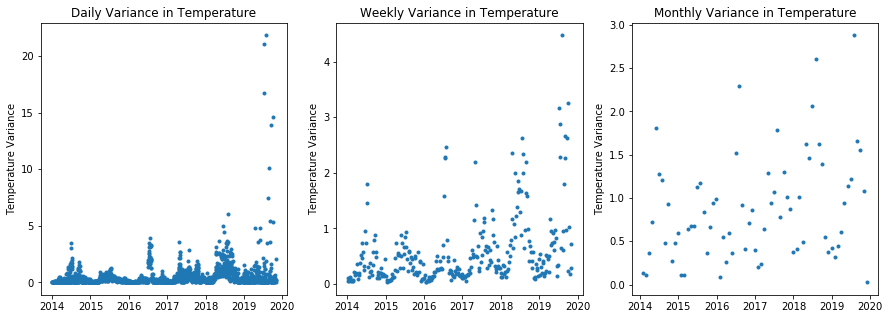

In [6]:
# How does temperature change over the course of days, months, or weeks? 
over_time = dat.copy() # create a dataframe copy
over_time = over_time.set_index('Date') # set the date as the index

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5)) # initialize plot

days = over_time.TempC.resample('D').var() # resample daily
ax1.plot(days, marker='.', linestyle='None') # plot
ax1.set_ylabel('Temperature Variance')
ax1.set_title('Daily Variance in Temperature')

weeks = over_time.TempC.resample('W').var() # resample weekly
ax2.plot(weeks, marker='.', linestyle='None') # plot
ax2.set_ylabel('Temperature Variance')
ax2.set_title('Weekly Variance in Temperature')

months = over_time.TempC.resample('M').var() # resample monthly
ax3.plot(months, marker='.', linestyle='None') # plot
ax3.set_ylabel('Temperature Variance')
ax3.set_title('Monthly Variance in Temperature')
plt.show() # show plot

There is no significant difference in temperature values when sharks are present compared to when they are not present. There is also a difference in the variance of temperature values across days, weeks, and months, where there is more variance in more recent months, and there's an oscillating difference int emperature across weeks of the year, where about mid year, temperature variances are higher.

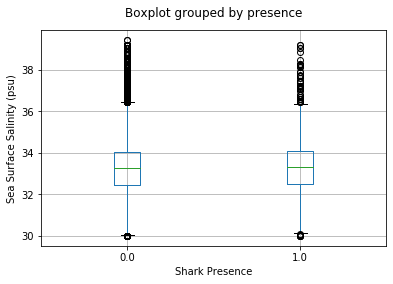

               mean       std
presence                     
0.0       33.287827  1.343819
1.0       33.292160  1.272818
Ttest_indResult(statistic=0.19917073909870342, pvalue=0.8421298126050738)


In [7]:
# Plot the salinity ranges for presence vs absence
dat.boxplot('Sal', 'presence')
plt.xlabel('Shark Presence')
plt.ylabel('Sea Surface Salinity (psu)')
plt.title('')
plt.show()

# Print some descriptive statistics
print(dat.groupby('presence')['Sal'].describe().loc[:,['mean','std']])

# Print the results of a t-test.
print(scipy.stats.ttest_ind(sharks.Sal, nosharks.Sal))

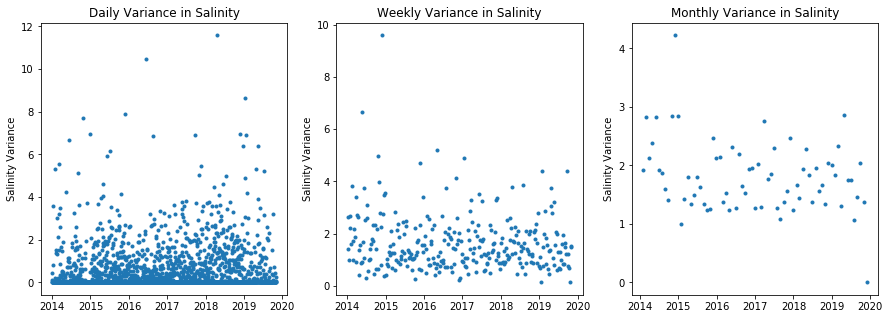

In [8]:
%matplotlib inline
# How does salinity change over the course of days, months, or weeks? 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5)) # initialize plot

days = over_time.Sal.resample('D').var() # resample daily
ax1.plot(days, marker='.', linestyle='None') # plot
ax1.set_ylabel('Salinity Variance')
ax1.set_title('Daily Variance in Salinity')

weeks = over_time.Sal.resample('W').var() # resample weekly
ax2.plot(weeks, marker='.', linestyle='None') # plot
ax2.set_ylabel('Salinity Variance')
ax2.set_title('Weekly Variance in Salinity')

months = over_time.Sal.resample('M').var() # resample monthly
ax3.plot(months, marker='.', linestyle='None') # plot
ax3.set_ylabel('Salinity Variance')
ax3.set_title('Monthly Variance in Salinity')
plt.show() # show plot

There is no significant difference in salinity values when sharks are present compared to when they are not present. In addition, there isn't really a clear difference in variance across the year. It looks pretty random.

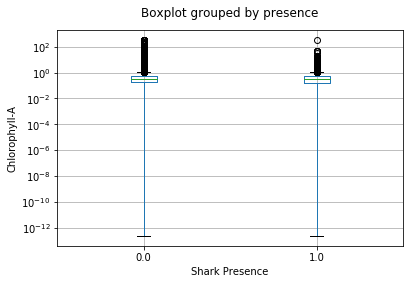

              mean       std
presence                    
0.0       0.859213  7.495075
1.0       0.724956  5.455596
Ttest_indResult(statistic=-1.1192727942738003, pvalue=0.2630279275348308)


In [9]:
# Plot the difference in Chlorophyll-A when sharks are present and not present
dat.boxplot('ChlA', 'presence')
plt.yscale('log')
plt.xlabel('Shark Presence')
plt.ylabel('Chlorophyll-A')
plt.title('')
plt.show()

# Print some descriptive statistics
print(dat.groupby('presence')['ChlA'].describe().loc[:,['mean','std']])

# Print the results of a t-test
print(scipy.stats.ttest_ind(sharks.ChlA, nosharks.ChlA))

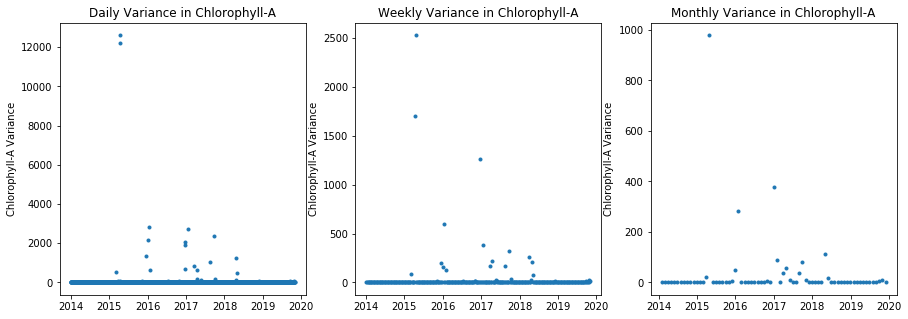

In [10]:
%matplotlib inline
# How does chla change over the course of days, months, or weeks? 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5)) # initialize plot

days = over_time.ChlA.resample('D').var() # resample daily
ax1.plot(days, marker='.', linestyle='None') # plot
ax1.set_ylabel('Chlorophyll-A Variance')
ax1.set_title('Daily Variance in Chlorophyll-A')

weeks = over_time.ChlA.resample('W').var() # resample weekly
ax2.plot(weeks, marker='.', linestyle='None') # plot
ax2.set_ylabel('Chlorophyll-A Variance')
ax2.set_title('Weekly Variance in Chlorophyll-A')

months = over_time.ChlA.resample('M').var() # resample monthly
ax3.plot(months, marker='.', linestyle='None') # plot
ax3.set_ylabel('Chlorophyll-A Variance')
ax3.set_title('Monthly Variance in Chlorophyll-A')
plt.show() # show plot

There is no significant difference in Chlorophyll-A values when sharks are present compared to when they are not present. Again, there is no real trend in the variance in Chlorophyll-A values across days, weeks, or months; sometimes there are peaks in variance, but there's not a clear pattern.

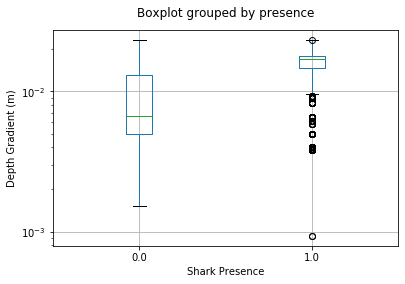

              mean       std
presence                    
0.0       0.008718  0.004951
1.0       0.015467  0.004195
Ttest_indResult(statistic=84.66941929786385, pvalue=0.0)


In [11]:
# Plot the relationship between shark presence and depth gradient
dat.boxplot('DepthGradient', 'presence')
plt.yscale('log')
plt.xlabel('Shark Presence')
plt.ylabel('Depth Gradient (m)')
plt.title('')
plt.show()

# Print some descriptive stats
print(dat.groupby('presence')['DepthGradient'].describe().loc[:,['mean','std']])

# Print the results of a t-test
print(scipy.stats.ttest_ind(sharks.DepthGradient, nosharks.DepthGradient))

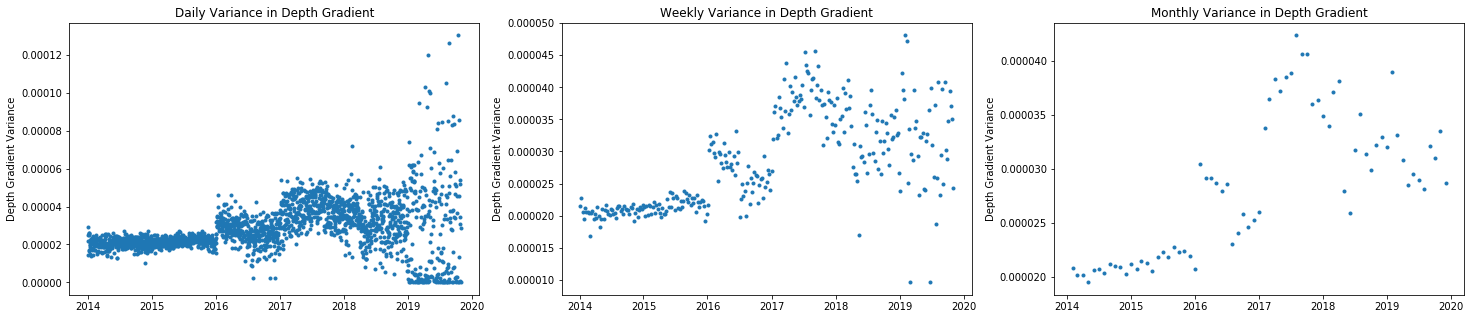

In [12]:
%matplotlib inline
# How does depth gradient change over the course of days, months, or weeks?  (it shouldn't)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5)) # initialize plot

days = over_time.DepthGradient.resample('D').var() # resample daily
ax1.plot(days, marker='.', linestyle='None') # plot
ax1.set_ylabel('Depth Gradient Variance')
ax1.set_title('Daily Variance in Depth Gradient')

weeks = over_time.DepthGradient.resample('W').var() # resample weekly
ax2.plot(weeks, marker='.', linestyle='None') # plot
ax2.set_ylabel('Depth Gradient Variance')
ax2.set_title('Weekly Variance in Depth Gradient')

months = over_time.DepthGradient.resample('M').var() # resample monthly
ax3.plot(months, marker='.', linestyle='None') # plot
ax3.set_ylabel('Depth Gradient Variance')
ax3.set_title('Monthly Variance in Depth Gradient')
plt.show() # show plot

There is a significant difference in depth gradient values when sharks are present compared to when they are not present. It appears that sharks are present over sands that have steeper slopes. Although we would expect no difference in variance over time (because depth gradients are relatively constant), we do see that there are higher variances in the more recent months/years in depth distribution. However, this may simply be an artifact of regions in which receivers are placed (more coverage in recent years in steep and flat environments). 